# **CAPSTONE PROJECT 2**

## **INTRO**

The public transportation system plays a vital role in urban cities, catering to the transportation needs of thousands of commuters on a daily basis. In a bustling metropolis like Jakarta, where traffic congestion is a persistent challenge, TransJakarta has emerged as a key player in providing efficient and reliable transport services. With its extensive network of bus routes spanning the city, TransJakarta serves as a lifeline for many residents and visitors alike.

We delve into a comprehensive analysis of TransJakarta passengers in 2021, aiming to uncover trends, patterns, and insights into the usage and preferences of the city's residents. By examining the available data, we gain valuable insights into the factors influencing passenger behavior and the overall effectiveness of the TransJakarta system.

Background:
TransJakarta, established in 2004, revolutionized public transportation in Jakarta by introducing the concept of a bus rapid transit (BRT) system. It was designed to provide a convenient, affordable, and efficient mode of transport, offering an alternative to private vehicles and reducing traffic congestion. Over the years, TransJakarta has expanded its fleet, routes, and services, becoming an integral part of Jakarta's transportation infrastructure.

In recent years, TransJakarta has witnessed significant growth in passenger numbers, reflecting its increasing popularity and the city's reliance on public transportation. Analyzing the passenger trends for a specific year, such as 2021, allows us to identify patterns, variations, and potential areas for improvement. By understanding passenger behavior and preferences, decision-makers can make data-driven decisions to enhance the quality and efficiency of TransJakarta services.

---

**Import Packages**

In [1319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

**Import Data Set**

In [1320]:
df = pd.read_csv('TransJakarta Passengers 2021.csv')
df.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


Table Information:
-   Tahun: It represents the year in which the trip took place. In this table, all the trips occurred in the year 2021.

-   Bulan: It represents the month in which the trip took place. The values in this column range from 1 to 12, representing the months of the year. In this table, the trips occurred in the month of October (bulan 10).

-   Jenis: It indicates the type of public transportation service. In this table, all the trips are categorized as "Mikrotrans," which is likely a specific type of microtransit service in Jakarta.

-   Kode_trayek: It represents the code for a specific route or line. Each route is assigned a unique code for identification purposes. Examples in this table include JAK.88, JAK.85, and JAK.84.

-   Trayek: It specifies the route or journey of the public transportation service. It typically consists of the starting point and the endpoint of the route. For example, "Terminal Tanjung Priok - Ancol Barat" represents a route starting from Terminal Tanjung Priok and ending at Ancol Barat.

-   Jumlah_penumpang: It represents the number of passengers or riders on a particular trip. This column indicates the count of passengers for each trip.

## **df Cleaning and Inspection**

Before diving into the analysis, we need to familiarize ourselves with our dataset in the data understanding stage. This process will help us identify any anomalies present in the dataset that need to be addressed during the data cleaning stage. For each anomaly we encounter, we will provide a justification for the steps taken, using both domain knowledge and statistical reasoning.

### **Data Information**

In [1321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


### **Missing Values**

In [1322]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [1323]:
# CHECK MISSING VALUES
df[df['trayek'].isna()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


Since there are only 2 missing values, we can fill it manually.

In [1324]:
# INPUT VALUE
df['trayek'] = np.where(df['kode_trayek'] == 'JAK.10B', 'Gondangdia - Cikini via Kramat Raya', df['trayek'])
df['trayek'] = np.where(df['kode_trayek'] == 'JAK.10A', 'Gondangdia - Cikini via Salemba Raya', df['trayek'])

In [1325]:
# CHECK MISSING VALUES AGAIN
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

### **Create Date Column**

Create date column to make our work easier in the data visualisation

**- Create the Column**

In [1326]:
df['date'] = df['tahun'].astype(str) + '-' + df['bulan'].astype(str)
df.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,date
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616,2021-10


**- Make the Date as End Date**

In [1327]:
df['date'] = pd.to_datetime(df['date']) + pd.offsets.MonthEnd(0)
df.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,date
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10-31
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10-31
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10-31
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10-31
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616,2021-10-31


**- Drop 'tahun' and 'bulan'**

In [1328]:
df.drop(columns=['tahun','bulan'], inplace= True)
df.head()

,jenis,kode_trayek,trayek,jumlah_penumpang,date
0,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10-31
1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10-31
2,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10-31
3,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10-31
4,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616,2021-10-31


### **e. Check for Typos in Every Columns**

**- 'jenis'**

In [1329]:
df['jenis'].unique()

array(['Mikrotrans', 'BRT', 'Angkutan Umum Integrasi'], dtype=object)

Insight:
- There is no typos in 'jenis'

**- 'kode_trayek'**

In [1330]:
list_ktrayek = pd.DataFrame(df['kode_trayek'].unique())
list_ktrayek.sort_values(by =0, ascending=True,inplace=True)
list_ktrayek.head()


,0
82,1
81,10
119,10K
80,11
118,11D


Insights:
- There are typos:
    - JA.77
    - JAK,19
    - JAK. 10B

In [1331]:
# INPUT VALUE
df['kode_trayek'] = np.where(df['kode_trayek'] == 'JA.77', 'JAK.77', df['kode_trayek'])
df['kode_trayek'] = np.where(df['kode_trayek'] == 'JAK,19', 'JAK.19', df['kode_trayek'])
df['kode_trayek'] = np.where(df['kode_trayek'] == 'JAK. 10B', 'JAK.10B', df['kode_trayek'])

Insights:
-   There are no more typos in 'kode_trayek'

**- 'trayek'**

In [1332]:
df.head()

,jenis,kode_trayek,trayek,jumlah_penumpang,date
0,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10-31
1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10-31
2,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10-31
3,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10-31
4,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,2021-10-31


In [1333]:
list_trayek = pd.DataFrame(df['trayek'].unique())
list_trayek.sort_values(by =0, ascending=True,inplace=True)
list_trayek.head()

,0
25,Andara - Stasiun Universitas Pancasila
85,Batu Sari-Tanah Abang
1,Bintara - Cipinang Indah
86,Bintaro - Blok M
38,Blok M - Andara


Insights:
- There are typos:
    - Ttanjung Priok - Plumpang
    - Pulo Ggadung 2 - Tosari
    - Kampung Melayu - Ppulo Gadung
    - Kp. Rambutan - Kalisari
    - Kp. Rambutan - Taman Wiladatika
    - Kota Tua Explorer
    - Tanah Abang Explorer

In [1334]:
# INPUT VALUE
df['trayek'] = np.where(df['trayek'] == 'Ttanjung Priok - Plumpang', 'Tanjung Priok - Plumpang', df['trayek'])
df['trayek'] = np.where(df['trayek'] == 'Pulo Ggadung 2 - Tosari', 'Pulo Gadung 2 - Tosari', df['trayek'])
df['trayek'] = np.where(df['trayek'] == 'Kampung Melayu - Ppulo Gadung', 'Kampung Melayu - Pulo Gadung', df['trayek'])
df['trayek'] = np.where(df['trayek'] == 'Kp. Rambutan - Kalisari', 'Kampung Rambutan - Kalisari', df['trayek'])
df['trayek'] = np.where(df['trayek'] == 'Kp. Rambutan - Taman Wiladatika', 'Kampung Rambutan - Taman Wiladatika', df['trayek'])
df['trayek'] = np.where(df['trayek'] == 'Kota Tua Explorer', 'Kota Tua Explorer - Kota Tua Explorer', df['trayek'])
df['trayek'] = np.where(df['trayek'] == 'Tanah Abang Explorer', 'Kota Tua Explorer - Kota Tua Explorer', df['trayek'])

Insights:
- There are no more typos in 'trayek'

In [1335]:
df.head()

,jenis,kode_trayek,trayek,jumlah_penumpang,date
0,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10-31
1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10-31
2,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10-31
3,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10-31
4,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,2021-10-31


### **Remove White Spaces**

Remove the white spaces, so there is no error when we are indexing some values

In [1336]:
# White Spaces in 'kode_trayek'
df['kode_trayek'] = df['kode_trayek'].str.replace(' ', '')

# White Spaces in 'trayek'
df['trayek']      = df['trayek'].str.replace('-', ' - ')

df['trayek']      = df['trayek'].str.strip()
df['kode_trayek'] = df['kode_trayek'].str.strip()
df['jenis']       = df['jenis'].str.strip()

### **Change Duplicate 'trayek' that Have Different 'kode_trayek'**

**- Find Unique 'trayek'**

In [1337]:
list_trayek = pd.DataFrame(df['trayek'].drop_duplicates())
list_trayek.sort_values(by ='trayek', ascending=True,inplace=True)
list_trayek.head()

,trayek
25,Andara - Stasiun Universitas Pancasila
86,Batu Sari - Tanah Abang
1,Bintara - Cipinang Indah
87,Bintaro - Blok M
38,Blok M - Andara


**- Merge the 'trayek' with 'kode_trayek'**

In [1338]:
result_df = pd.merge(list_trayek, df[['trayek', 'kode_trayek']], on='trayek', how='left').drop_duplicates()
result_df.sort_values(by = 'kode_trayek', ascending= True, inplace= True)
result_df.head()

,trayek,kode_trayek
60,Blok M - Kota,1
1353,Tanjung Priok - PGC 2,10
1377,Tanjung Priok - Senen via Taman BMW,10K
912,Pulo Gebang - Kampung Melayu,11
924,Pulo Gebang - Pulo Gadung 2 via PIK,11D


**- Find the Duplicates**

In [1339]:
result_df[result_df['kode_trayek'].duplicated()]

/Users/achmadrizkyakbar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,trayek,kode_trayek
740,Pantai Maju - Balai Kota,1A
1142,Sentraland Cengkareng - Puri Kembangan,3E
231,Gondangdia - Cikini via Kramat Jaya,JAK.10B


**- Alter the Values**

In [1340]:
df['trayek'] = np.where(df['kode_trayek'] == '1A', 'Pantai Maju - Balai Kota', df['trayek'])
df['trayek'] = np.where(df['kode_trayek'] == '3E', 'Sentraland Cengkareng - Puri Kembangan', df['trayek'])
df['trayek'] = np.where(df['kode_trayek'] == 'JAK.10B', 'Gondangdia - Cikini via Kramat Raya', df['trayek'])
df['trayek'] = np.where(df['kode_trayek'] == 'JAK.16', 'PGC - Condet', df['trayek'])

**- Double Check**

In [1341]:
df[df['kode_trayek'] == '1A'].sort_values(by='date', ascending=True)

,jenis,kode_trayek,trayek,jumlah_penumpang,date
605,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721,2021-01-31
1093,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669,2021-02-28
363,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592,2021-03-31
1339,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,69934,2021-04-30
726,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62524,2021-05-31
483,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,66928,2021-06-30
1217,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,29960,2021-07-31
237,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,35608,2021-08-31
972,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,54065,2021-09-30
115,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,67571,2021-10-31


In [1342]:
df[df['kode_trayek'] == '3E'].sort_values(by='date', ascending=True)

,jenis,kode_trayek,trayek,jumlah_penumpang,date
594,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,24385,2021-01-31
1082,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,17495,2021-02-28
350,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23513,2021-03-31
1328,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23523,2021-04-30
715,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22119,2021-05-31
472,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23236,2021-06-30
1204,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,12046,2021-07-31
226,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,16416,2021-08-31
961,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22173,2021-09-30
104,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,24133,2021-10-31


In [1343]:
df[df['kode_trayek'] == 'JAK.10B'].sort_values(by='date', ascending=True)

,jenis,kode_trayek,trayek,jumlah_penumpang,date
304,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828,2021-03-31
1158,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,3136,2021-07-31
1404,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008,2021-11-30
795,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085,2021-12-31


In [1344]:
result_df = pd.merge(list_trayek, df[['trayek', 'kode_trayek']], on='trayek', how='left').drop_duplicates()
result_df.sort_values(by = 'kode_trayek', ascending= True, inplace= True)
result_df[result_df['kode_trayek'].isna()]

,trayek,kode_trayek
219,Gondangdia - Cikini via Kramat Jaya,NaN
220,Gondangdia - Cikini via Kramat Raya,NaN
693,PIK - Balai Kota,NaN
718,Pantai Maju - Balai Kota,NaN
924,Puri Kembangan - Sentraland Cengkareng,NaN
1116,Sentraland Cengkareng - Puri Kembangan,NaN


Insights:
- All 'trayek' and 'kode_trayek' match.
- No more the same 'kode_trayek' with different 'trayek'

### **Splitting 'trayek' to 'origin' and 'destination'**

In [1345]:
df.head()

,jenis,kode_trayek,trayek,jumlah_penumpang,date
0,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10-31
1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10-31
2,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10-31
3,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10-31
4,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,2021-10-31


**- Split the 'trayek' Column into 'origin' and 'destination'**

In [1346]:
df[['origin', 'destination']] = df['trayek'].str.split(' - ', expand=True)

**- Remove White spaces for 'origin' and 'destination'**

In [1347]:
df['origin'] = df['origin'].str.rstrip()
df['destination'] = df['destination'].str.lstrip()

In [1348]:
df.head()

,jenis,kode_trayek,trayek,jumlah_penumpang,date,origin,destination
0,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10-31,Terminal Tanjung Priok,Ancol Barat
1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10-31,Bintara,Cipinang Indah
2,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10-31,Terminal Kampung Melayu,Kapin Raya
3,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10-31,Rawa Buaya,Rawa Kompeni
4,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,2021-10-31,Tanjung Priok,Jembatan Item


### **Rename and Rearrange Columns**

**- Rename**

- Rename df to df_passengers

In [1349]:
df_passengers = df

In [1350]:
df_passengers.rename(columns={
    'jenis':'mode',
    'kode_trayek':'route_id',
    'trayek':'route',
    'jumlah_penumpang':'passengers',    
}, inplace=True)
df_passengers.head()

,mode,route_id,route,passengers,date,origin,destination
0,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,2021-10-31,Terminal Tanjung Priok,Ancol Barat
1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,2021-10-31,Bintara,Cipinang Indah
2,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,2021-10-31,Terminal Kampung Melayu,Kapin Raya
3,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,2021-10-31,Rawa Buaya,Rawa Kompeni
4,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,2021-10-31,Tanjung Priok,Jembatan Item


**- Rearrange**

In [1351]:
df_passengers = df_passengers[['date', 'route_id', 'mode', 'route', 'origin', 'destination', 'passengers']]
df_passengers.head()

,date,route_id,mode,route,origin,destination,passengers
0,2021-10-31,JAK.88,Mikrotrans,Terminal Tanjung Priok - Ancol Barat,Terminal Tanjung Priok,Ancol Barat,31197
1,2021-10-31,JAK.85,Mikrotrans,Bintara - Cipinang Indah,Bintara,Cipinang Indah,30711
2,2021-10-31,JAK.84,Mikrotrans,Terminal Kampung Melayu - Kapin Raya,Terminal Kampung Melayu,Kapin Raya,40186
3,2021-10-31,JAK.80,Mikrotrans,Rawa Buaya - Rawa Kompeni,Rawa Buaya,Rawa Kompeni,61883
4,2021-10-31,JAK.77,Mikrotrans,Tanjung Priok - Jembatan Item,Tanjung Priok,Jembatan Item,66616


**- Sort Values**

In [1352]:
df_passengers.sort_values(by = ['date','mode'], inplace=True)
df_passengers.head()

,date,route_id,mode,route,origin,destination,passengers
573,2021-01-31,GR5,Angkutan Umum Integrasi,Kota Tua Explorer - Kota Tua Explorer,Kota Tua Explorer,Kota Tua Explorer,261
574,2021-01-31,GR4,Angkutan Umum Integrasi,Taman Kota Intan - Museum Bahari,Taman Kota Intan,Museum Bahari,76
575,2021-01-31,9E,Angkutan Umum Integrasi,Kebayoran Lama - Jelambar,Kebayoran Lama,Jelambar,15039
576,2021-01-31,9D,Angkutan Umum Integrasi,Pasar Minggu - Tanah Abang,Pasar Minggu,Tanah Abang,75918
577,2021-01-31,8K,Angkutan Umum Integrasi,Batu Sari - Tanah Abang,Batu Sari,Tanah Abang,6867


In [1353]:
df_passengers.reset_index(drop=True, inplace=True)
df_passengers.head()


,date,route_id,mode,route,origin,destination,passengers
0,2021-01-31,GR5,Angkutan Umum Integrasi,Kota Tua Explorer - Kota Tua Explorer,Kota Tua Explorer,Kota Tua Explorer,261
1,2021-01-31,GR4,Angkutan Umum Integrasi,Taman Kota Intan - Museum Bahari,Taman Kota Intan,Museum Bahari,76
2,2021-01-31,9E,Angkutan Umum Integrasi,Kebayoran Lama - Jelambar,Kebayoran Lama,Jelambar,15039
3,2021-01-31,9D,Angkutan Umum Integrasi,Pasar Minggu - Tanah Abang,Pasar Minggu,Tanah Abang,75918
4,2021-01-31,8K,Angkutan Umum Integrasi,Batu Sari - Tanah Abang,Batu Sari,Tanah Abang,6867


In [1354]:
df_passengers.reset_index(inplace=True)
df_passengers.rename(columns={'index':'Unnamed: 0'}, inplace= True)
df_passengers.head()

,Unnamed: 0,date,route_id,mode,route,origin,destination,passengers
0,0,2021-01-31,GR5,Angkutan Umum Integrasi,Kota Tua Explorer - Kota Tua Explorer,Kota Tua Explorer,Kota Tua Explorer,261
1,1,2021-01-31,GR4,Angkutan Umum Integrasi,Taman Kota Intan - Museum Bahari,Taman Kota Intan,Museum Bahari,76
2,2,2021-01-31,9E,Angkutan Umum Integrasi,Kebayoran Lama - Jelambar,Kebayoran Lama,Jelambar,15039
3,3,2021-01-31,9D,Angkutan Umum Integrasi,Pasar Minggu - Tanah Abang,Pasar Minggu,Tanah Abang,75918
4,4,2021-01-31,8K,Angkutan Umum Integrasi,Batu Sari - Tanah Abang,Batu Sari,Tanah Abang,6867


## **The Data is Clean and Ready to Use**

---

## **Passengers Pivot Table**

In [1355]:
df_passengers_pivot = df.pivot_table(
    index='route_id',
    columns='date',
    values='passengers'
)
df_passengers_pivot.rename_axis('route_id', inplace=True)


In [1356]:
df_passengers_pivot.fillna(np.nan).head()

date,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
route_id,,,,,,,,,,,,
1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
10,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
10K,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
11,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
11D,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0


---

# **IMPORT ADDITIONAL DATA**

In [1357]:
df_frequencies = pd.read_csv('frequencies.txt')
df_routes = pd.read_csv('routes.txt')
df_shapes = pd.read_csv('shapes.txt')
df_stop_times = pd.read_csv('stop_times.txt')
df_stops = pd.read_csv('stops.txt')
df_transfers = pd.read_csv('transfers.txt')
df_trips = pd.read_csv('trips.txt')


# **DATA INSPECTION AND CLEANING**

### **df_frequencies**

In [1358]:
df_frequencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2165 non-null   int64 
 1   trip_id       2165 non-null   object
 2   start_time    2165 non-null   object
 3   end_time      2165 non-null   object
 4   headway_secs  2165 non-null   int64 
 5   exact_times   2165 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 101.6+ KB


In [1359]:
df_frequencies.head()

,Unnamed: 0,trip_id,start_time,end_time,headway_secs,exact_times
0,0,10A-R01,05:00:00,06:00:00,1200,0
1,1,10A-R01,06:00:00,09:00:00,600,0
2,2,10A-R01,09:00:00,16:00:00,1200,0
3,3,10A-R01,16:00:00,20:00:00,600,0
4,4,10A-R01,20:00:00,22:00:00,1200,0


In [1360]:
df_frequencies['exact_times'].value_counts()

0    2165
Name: exact_times, dtype: int64

In [1361]:
# Drop 'exact_times'
df_frequencies.drop(columns='exact_times', inplace=True)

In [1362]:
# Convert 'end_time' values of '29:00:00' to '02:00:00'
df_frequencies['end_time'] = np.where(df_frequencies['end_time'] == '29:00:00', '02:00:00', df_frequencies['end_time'])

# Convert 'end_time' values of '24:00:00' to '00:00:00'
df_frequencies['end_time'] = np.where(df_frequencies['end_time'] == '24:00:00', '00:00:00', df_frequencies['end_time'])


In [1363]:
import datetime

# Convert 'end_time' column to appropriate datatype
df_frequencies['start_time'] = pd.to_datetime(df_frequencies['start_time'], format='%H:%M:%S')
df_frequencies['end_time'] = pd.to_datetime(df_frequencies['end_time'], format='%H:%M:%S')
df_frequencies.head()

,Unnamed: 0,trip_id,start_time,end_time,headway_secs
0,0,10A-R01,1900-01-01 05:00:00,1900-01-01 06:00:00,1200
1,1,10A-R01,1900-01-01 06:00:00,1900-01-01 09:00:00,600
2,2,10A-R01,1900-01-01 09:00:00,1900-01-01 16:00:00,1200
3,3,10A-R01,1900-01-01 16:00:00,1900-01-01 20:00:00,600
4,4,10A-R01,1900-01-01 20:00:00,1900-01-01 22:00:00,1200


In [1364]:
# Update it into time
df_frequencies['start_time'] = df_frequencies['start_time'].dt.time
df_frequencies['end_time'] = df_frequencies['end_time'].dt.time
df_frequencies.head()

,Unnamed: 0,trip_id,start_time,end_time,headway_secs
0,0,10A-R01,05:00:00,06:00:00,1200
1,1,10A-R01,06:00:00,09:00:00,600
2,2,10A-R01,09:00:00,16:00:00,1200
3,3,10A-R01,16:00:00,20:00:00,600
4,4,10A-R01,20:00:00,22:00:00,1200


The table represents data related to public transportation trips. Each row in the table represents a specific trip with its corresponding details. Here is an explanation of each column:

1. Unnamed: 0: This column appears to be an index column automatically generated by the system when the data was imported. It assigns a unique numerical identifier to each row.

2. trip_id: It represents the ID or code assigned to a particular trip. Each trip is identified by a unique trip_id, which helps in distinguishing between different trips.

3. start_time: It indicates the time at which the trip starts. The time is represented in the format HH:MM:SS (hours:minutes:seconds).

4. end_time: It indicates the time at which the trip ends. Similar to the start_time column, the end_time is also represented in the format HH:MM:SS.

5. headway_secs: It represents the headway, which is the time interval between consecutive trips on the same route. The headway_secs column specifies the time duration in seconds between the current trip and the next one on the same route.

By analyzing this table, we can understand the sequence of trips, their start and end times, and the time intervals between them. This information can be useful for analyzing the frequency and schedule of public transportation trips.

### **df_routes**

In [1365]:
df_routes.head()

,Unnamed: 0,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,0,1,Tije,1,Blok M - Kota,NaN,3,NaN,D62126,FFFFFF
1,1,2,Tije,2,Pulo Gadung - Monas,NaN,3,NaN,2F489C,FFFFFF
2,2,3,Tije,3,Kalideres - Bundaran HI via Veteran,NaN,3,NaN,FDCB1C,000000
3,3,4,Tije,4,Pulo Gadung 2 - Tosari,NaN,3,NaN,512C62,FFFFFF
4,4,5,Tije,5,Matraman Baru - Ancol,NaN,3,NaN,D46425,000000


In [1366]:
# Update Columns
df_routes = df_routes.drop(columns=['route_desc', 'agency_id', 'route_short_name', 'route_url'])
df_routes.head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
0,0,1,Blok M - Kota,3,D62126,FFFFFF
1,1,2,Pulo Gadung - Monas,3,2F489C,FFFFFF
2,2,3,Kalideres - Bundaran HI via Veteran,3,FDCB1C,000000
3,3,4,Pulo Gadung 2 - Tosari,3,512C62,FFFFFF
4,4,5,Matraman Baru - Ancol,3,D46425,000000


The table provides information about different public transportation routes. Each row in the table represents a specific route and its corresponding details. Here is an explanation of each column:

1. Unnamed: 0: This column appears to be an index column automatically generated by the system when the data was imported. It assigns a unique numerical identifier to each row.

2. route_id: It represents the ID or code assigned to a particular route. Each route is identified by a unique route_id, which helps in distinguishing between different routes.

3. route_long_name: It specifies the full or long name of the route. This column typically includes the starting and ending points or major landmarks along the route.

4. route_type: It represents the type of transportation service for the route. The route_type column provides a numerical code to indicate the type, such as bus, tram, subway, or other modes of transportation. The specific code values may vary depending on the transportation system or standard being used.

5. route_color: It indicates the color associated with the route. This column represents the visual representation of the route by assigning a specific color code. It helps in visually differentiating routes on maps or other representations.

6. route_text_color: It specifies the color of the text or font used to display the route information. This column represents the color code for the text that is displayed alongside or on top of the route representation.

By analyzing this table, we can gain insights into the different public transportation routes, their IDs, full names, route types, and associated colors. This information is helpful for identifying and distinguishing routes, understanding their characteristics, and displaying them visually in various applications.

### **df_shapes**

In [1367]:
df_shapes.head()

,Unnamed: 0,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,0,10A-R01_shp,-6.097080,106.962306,0,NaN
1,1,10A-R01_shp,-6.097075,106.962333,1,NaN
2,2,10A-R01_shp,-6.096431,106.964359,2,NaN
3,3,10A-R01_shp,-6.096459,106.964440,3,NaN
4,4,10A-R01_shp,-6.096528,106.964458,4,NaN


In [1368]:
# Drop Column
df_shapes = df_shapes.drop(columns='shape_dist_traveled')
df_shapes.head()

,Unnamed: 0,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,0,10A-R01_shp,-6.097080,106.962306,0
1,1,10A-R01_shp,-6.097075,106.962333,1
2,2,10A-R01_shp,-6.096431,106.964359,2
3,3,10A-R01_shp,-6.096459,106.964440,3
4,4,10A-R01_shp,-6.096528,106.964458,4


The table represents geographic shape data for a specific public transportation route. Each row in the table corresponds to a point along the route's shape. Here is an explanation of each column:

1. Unnamed: 0: This column appears to be an index column automatically generated by the system when the data was imported. It assigns a unique numerical identifier to each row.

2. shape_id: It represents the ID or code assigned to a specific shape of a route. This ID helps in distinguishing different shapes within the same route, which may indicate variations or branches in the route's path.

3. shape_pt_lat: It specifies the latitude coordinate of a point on the route's shape. Latitude measures how far north or south a location is from the equator.

4. shape_pt_lon: It indicates the longitude coordinate of a point on the route's shape. Longitude measures how far east or west a location is from the Prime Meridian.

5. shape_pt_sequence: It represents the sequence or order of the points along the route's shape. Each point is assigned a unique numerical value, indicating its position or sequence in relation to other points on the same shape.

By analyzing this table, we can understand the geographic coordinates (latitude and longitude) of points along a specific route's shape. These points help define the path or trajectory of the route, allowing for visualization on maps or other geographical representations. The shape_id and shape_pt_sequence columns provide additional information about the structure and order of the shape's points.

### **df_stop_times**

In [1369]:
df_stop_times.head()

,Unnamed: 0,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,shape_dist_traveled
0,0,10A-R01,05:00:00,05:00:10,B03282P,0,NaN,0,NaN
1,1,10A-R01,05:00:44,05:00:54,B03283P,1,NaN,0,NaN
2,2,10A-R01,05:02:31,05:02:41,B05078P,2,NaN,0,NaN
3,3,10A-R01,05:05:34,05:05:44,B06039P,3,NaN,0,NaN
4,4,10A-R01,05:06:29,05:06:39,B00136P,4,NaN,0,NaN


In [1370]:
# Update Columns
df_stop_times = df_stop_times[['Unnamed: 0', 'trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence']]
df_stop_times.head()

,Unnamed: 0,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,0,10A-R01,05:00:00,05:00:10,B03282P,0
1,1,10A-R01,05:00:44,05:00:54,B03283P,1
2,2,10A-R01,05:02:31,05:02:41,B05078P,2
3,3,10A-R01,05:05:34,05:05:44,B06039P,3
4,4,10A-R01,05:06:29,05:06:39,B00136P,4


The table represents data related to the stops along a specific public transportation trip. Each row in the table corresponds to a stop along the trip and provides details about the arrival and departure times at that stop. Here is an explanation of each column:

1. Unnamed: 0: This column appears to be an index column automatically generated by the system when the data was imported. It assigns a unique numerical identifier to each row.

2. trip_id: It represents the ID or code assigned to a particular trip. Each trip is identified by a unique trip_id, which helps in distinguishing between different trips.

3. arrival_time: It indicates the time at which the vehicle arrives at a specific stop during the trip. The time is represented in the format HH:MM:SS (hours:minutes:seconds).

4. departure_time: It indicates the time at which the vehicle departs from a specific stop during the trip. Similar to the arrival_time column, the departure_time is also represented in the format HH:MM:SS.

5. stop_id: It represents the ID or code assigned to a specific stop along the trip. Each stop is identified by a unique stop_id, which helps in distinguishing between different stops.

6. stop_sequence: It represents the sequence or order of the stops along the trip. Each stop is assigned a unique numerical value, indicating its position or sequence in relation to other stops on the same trip.

By analyzing this table, we can understand the sequence of stops along a specific trip, the arrival and departure times at each stop, and the order in which the stops are visited. This information is valuable for analyzing the schedule, timing, and progression of public transportation trips.

### **df_stops**

In [1371]:
df_stops.head()

,Unnamed: 0,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,wheelchair_boarding,parent_station,platform_code
0,0,B00001P,18 Office Park,NaN,-6.299146,106.83210,1,NaN,0,2.0,NaN,NaN
1,1,B00002P,ABA,NaN,-6.194149,106.83939,1,NaN,0,2.0,NaN,NaN
2,2,B00003P,Acacia Residence,NaN,-6.263358,106.75675,1,NaN,0,2.0,NaN,NaN
3,3,B00004P,ACC Simatupang,NaN,-6.304475,106.84858,1,NaN,0,2.0,NaN,NaN
4,4,B00005P,ACE Hardware,NaN,-6.387532,106.82738,1,NaN,0,2.0,NaN,NaN


In [1372]:
# Update Columns
df_stops = df_stops[['Unnamed: 0', 'stop_id', 'stop_name', 'stop_lat', 'stop_lon']]
df_stops.head()

,Unnamed: 0,stop_id,stop_name,stop_lat,stop_lon
0,0,B00001P,18 Office Park,-6.299146,106.83210
1,1,B00002P,ABA,-6.194149,106.83939
2,2,B00003P,Acacia Residence,-6.263358,106.75675
3,3,B00004P,ACC Simatupang,-6.304475,106.84858
4,4,B00005P,ACE Hardware,-6.387532,106.82738


The table represents data related to specific bus stops along a public transportation route. Each row in the table corresponds to a unique bus stop and provides details about the stop's ID, name, and geographical coordinates. Here is an explanation of each column:

1. Unnamed: 0: This column appears to be an index column automatically generated by the system when the data was imported. It assigns a unique numerical identifier to each row.

2. stop_id: It represents the ID or code assigned to a specific bus stop. Each stop is identified by a unique stop_id, which helps in distinguishing between different bus stops.

3. stop_name: It specifies the name or label given to the bus stop. This column provides a descriptive name that helps in identifying the stop location.

4. stop_lat: It indicates the latitude coordinate of the bus stop's location. Latitude measures how far north or south a location is from the equator.

5. stop_lon: It indicates the longitude coordinate of the bus stop's location. Longitude measures how far east or west a location is from the Prime Meridian.

By analyzing this table, we can understand the specific bus stops along a route, their IDs, names, and geographical coordinates. This information is valuable for identifying and locating bus stops on maps, calculating distances between stops, and providing accurate navigation instructions for public transportation users.

### **df_trips**

In [1373]:
df_trips.head()

,Unnamed: 0,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,0,1,SH,1-R05,Blok M - Kali Besar Barat,0,NaN,1-R05_shp
1,1,1,SH,1-R06,Kali Besar Barat - Blok M,1,NaN,1-R06_shp
2,2,10,SH,10-R01,Tanjung Priok - PGC 2,0,NaN,10-R01_shp
3,3,10,SH,10-R02,PGC 2 - Tanjung Priok,1,NaN,10-R02_shp
4,4,10A,HK,10A-R01,Rusun Marunda - Tanjung Priok,0,NaN,10A-R01_shp


In [1374]:
# Take only 1 way direction: 'Direction = 0'
df_trips = df_trips[df_trips['direction_id'] == 0]
df_trips.head()

,Unnamed: 0,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,0,1,SH,1-R05,Blok M - Kali Besar Barat,0,NaN,1-R05_shp
2,2,10,SH,10-R01,Tanjung Priok - PGC 2,0,NaN,10-R01_shp
4,4,10A,HK,10A-R01,Rusun Marunda - Tanjung Priok,0,NaN,10A-R01_shp
6,6,10B,HK,10B-R01,Rusun Cipinang Besar Selatan - Penas Kalimalang,0,NaN,10B-R01_shp
8,8,10D,HK,10D-R01,Tanjung Priok - Kampung Rambutan,0,NaN,10D-R01_shp


In [1375]:
# Drop Columns
df_trips = df_trips.drop(columns=['service_id', 'direction_id', 'block_id'])
df_trips.head()

,Unnamed: 0,route_id,trip_id,trip_headsign,shape_id
0,0,1,1-R05,Blok M - Kali Besar Barat,1-R05_shp
2,2,10,10-R01,Tanjung Priok - PGC 2,10-R01_shp
4,4,10A,10A-R01,Rusun Marunda - Tanjung Priok,10A-R01_shp
6,6,10B,10B-R01,Rusun Cipinang Besar Selatan - Penas Kalimalang,10B-R01_shp
8,8,10D,10D-R01,Tanjung Priok - Kampung Rambutan,10D-R01_shp


The table provides information about specific trips on different routes of public transportation. Each row in the table represents a unique trip and provides details such as the route ID, trip ID, trip headsign, and shape ID. Here is an explanation of each column:

1. Unnamed: 0: This column appears to be an index column automatically generated by the system when the data was imported. It assigns a unique numerical identifier to each row.

2. route_id: It represents the ID or code assigned to a specific route. Each route is identified by a unique route_id, which helps in distinguishing between different routes.

3. trip_id: It represents the ID or code assigned to a particular trip. Each trip is identified by a unique trip_id, which helps in distinguishing between different trips on the same route.

4. trip_headsign: It specifies the headsign or destination of the trip. The trip_headsign column provides a brief description or label indicating the ultimate destination or direction of the trip.

5. shape_id: It represents the ID or code assigned to a specific shape or path of the route. Each shape is identified by a unique shape_id, which helps in distinguishing between different shapes within the same route.

By analyzing this table, we can understand the specific trips on different public transportation routes, their corresponding IDs, trip headsigns (destinations), and the associated shape IDs. This information is valuable for identifying and tracking specific trips, understanding their destinations, and associating them with the corresponding shape data to visualize their paths on maps or other geographical representations.

# **EXPORT DATA**

In [1376]:
df_passengers.to_csv('passengers.csv', index=False)
df_passengers_pivot.to_csv('passengers_pivot.csv', index=False)

df_frequencies.to_csv('frequencies.csv', index = None)
df_routes.to_csv('routes.csv', index = None)
df_shapes.to_csv('shapes.csv', index = None)
df_stop_times.to_csv('stop_times.csv', index = None)
df_stops.to_csv('stops.csv', index = None)
df_transfers.to_csv('transfers.csv', index = None)
df_trips.to_csv('trips.csv', index = None)

By having this all data, we can connect it with each other to gain valuable insights.

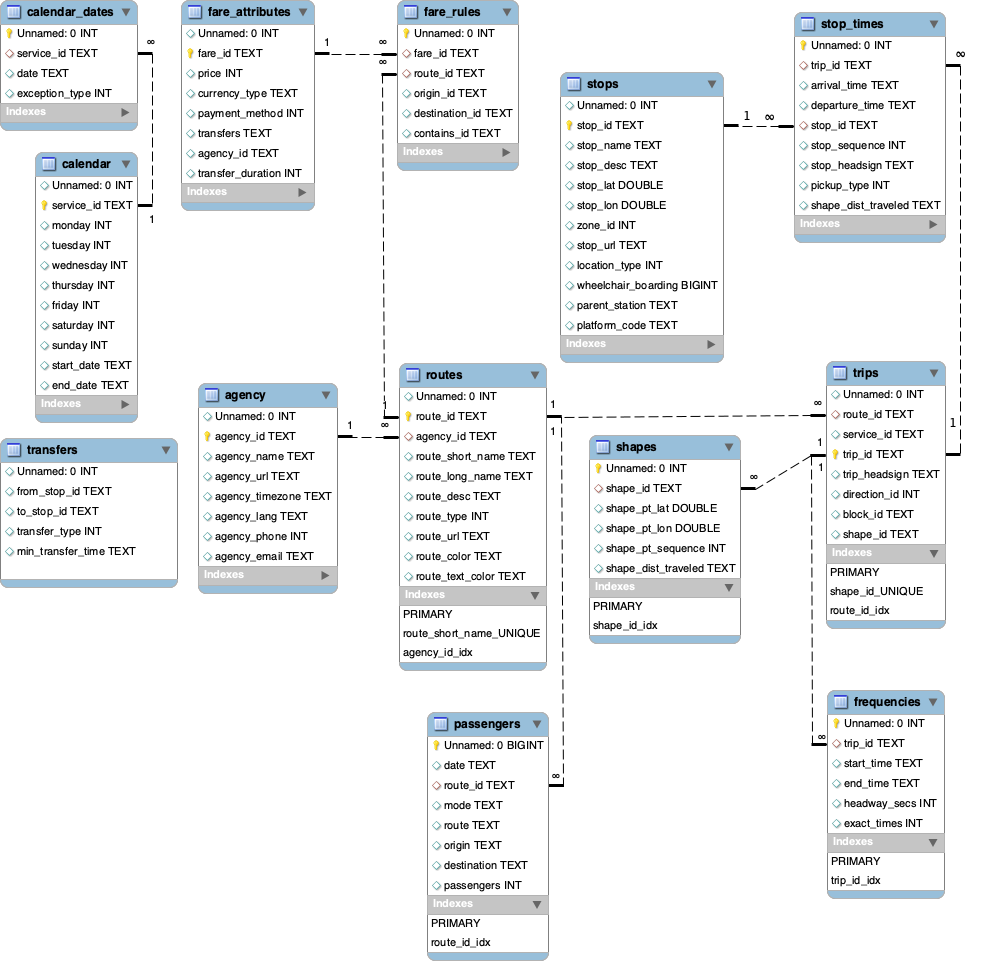

In [1429]:
from PIL import Image
from IPython.display import display

# Open the image file
image = Image.open('transjakarta_relationship.PNG')  # Replace "path_to_image_file.jpg" with the actual file path

# Display the image
display(image)

---

## **Generate All Routes that Finished and Cross Corridor 1**

### **Finish at Blok-M**

In [1377]:
df_passengers.head()

,Unnamed: 0,date,route_id,mode,route,origin,destination,passengers
0,0,2021-01-31,GR5,Angkutan Umum Integrasi,Kota Tua Explorer - Kota Tua Explorer,Kota Tua Explorer,Kota Tua Explorer,261
1,1,2021-01-31,GR4,Angkutan Umum Integrasi,Taman Kota Intan - Museum Bahari,Taman Kota Intan,Museum Bahari,76
2,2,2021-01-31,9E,Angkutan Umum Integrasi,Kebayoran Lama - Jelambar,Kebayoran Lama,Jelambar,15039
3,3,2021-01-31,9D,Angkutan Umum Integrasi,Pasar Minggu - Tanah Abang,Pasar Minggu,Tanah Abang,75918
4,4,2021-01-31,8K,Angkutan Umum Integrasi,Batu Sari - Tanah Abang,Batu Sari,Tanah Abang,6867


In [1378]:
df_fin_blok_m = df_passengers[df_passengers['destination'] == 'Blok M'][['route_id','route', 'mode','origin','destination']].drop_duplicates()
df_fin_blok_m = df_fin_blok_m.sort_values(by = 'route_id')
df_fin_blok_m

,route_id,route,mode,origin,destination
30,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,Pesanggrahan,Blok M
29,1E,Pondok Labu - Blok M,Angkutan Umum Integrasi,Pondok Labu,Blok M
26,1M,Meruya - Blok M,Angkutan Umum Integrasi,Meruya,Blok M
25,1N,Tanah Abang - Blok M,Angkutan Umum Integrasi,Tanah Abang,Blok M
23,1Q,Rempoa - Blok M,Angkutan Umum Integrasi,Rempoa,Blok M
10,7B,Kampung Rambutan - Blok M,Angkutan Umum Integrasi,Kampung Rambutan,Blok M
6,8D,Joglo - Blok M,Angkutan Umum Integrasi,Joglo,Blok M
5,8E,Bintaro - Blok M,Angkutan Umum Integrasi,Bintaro,Blok M
120,9H,Cipedak - Blok M,Angkutan Umum Integrasi,Cipedak,Blok M


---

## **Plot the Routes that Finish at Blok M**

In [1379]:
df_routes.head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
0,0,1,Blok M - Kota,3,D62126,FFFFFF
1,1,2,Pulo Gadung - Monas,3,2F489C,FFFFFF
2,2,3,Kalideres - Bundaran HI via Veteran,3,FDCB1C,000000
3,3,4,Pulo Gadung 2 - Tosari,3,512C62,FFFFFF
4,4,5,Matraman Baru - Ancol,3,D46425,000000


In [1380]:
df_to_blok_m = pd.merge(df_fin_blok_m,df_routes, on = 'route_id').merge(df_trips, on = 'route_id').merge(df_shapes)
df_to_blok_m.head()

,route_id,route,mode,origin,destination,Unnamed: 0_x,route_long_name,route_type,route_color,route_text_color,Unnamed: 0_y,trip_id,trip_headsign,shape_id,Unnamed: 0,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,Pesanggrahan,Blok M,33,Pesanggrahan - Blok M,3,D65E62,000000,60,1C-R01,Pesanggrahan - Blok M,1C-R01_shp,99546,-6.260187,106.765962,0
1,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,Pesanggrahan,Blok M,33,Pesanggrahan - Blok M,3,D65E62,000000,60,1C-R01,Pesanggrahan - Blok M,1C-R01_shp,99547,-6.259801,106.765797,1
2,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,Pesanggrahan,Blok M,33,Pesanggrahan - Blok M,3,D65E62,000000,60,1C-R01,Pesanggrahan - Blok M,1C-R01_shp,99548,-6.259000,106.765520,2
3,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,Pesanggrahan,Blok M,33,Pesanggrahan - Blok M,3,D65E62,000000,60,1C-R01,Pesanggrahan - Blok M,1C-R01_shp,99549,-6.258860,106.765470,3
4,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,Pesanggrahan,Blok M,33,Pesanggrahan - Blok M,3,D65E62,000000,60,1C-R01,Pesanggrahan - Blok M,1C-R01_shp,99550,-6.258451,106.765351,4


In [1381]:
df_to_blok_m = pd.merge(df_fin_blok_m,df_routes, on = 'route_id').merge(df_trips, on = 'route_id').merge(df_shapes)
df_to_blok_m = df_to_blok_m[['route_id','route','mode','shape_pt_lat','shape_pt_lon','shape_pt_sequence',]]
df_to_blok_m.head()

,route_id,route,mode,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.260187,106.765962,0
1,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.259801,106.765797,1
2,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.259000,106.765520,2
3,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.258860,106.765470,3
4,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.258451,106.765351,4


---

In [1382]:
df_passengers.head()

,Unnamed: 0,date,route_id,mode,route,origin,destination,passengers
0,0,2021-01-31,GR5,Angkutan Umum Integrasi,Kota Tua Explorer - Kota Tua Explorer,Kota Tua Explorer,Kota Tua Explorer,261
1,1,2021-01-31,GR4,Angkutan Umum Integrasi,Taman Kota Intan - Museum Bahari,Taman Kota Intan,Museum Bahari,76
2,2,2021-01-31,9E,Angkutan Umum Integrasi,Kebayoran Lama - Jelambar,Kebayoran Lama,Jelambar,15039
3,3,2021-01-31,9D,Angkutan Umum Integrasi,Pasar Minggu - Tanah Abang,Pasar Minggu,Tanah Abang,75918
4,4,2021-01-31,8K,Angkutan Umum Integrasi,Batu Sari - Tanah Abang,Batu Sari,Tanah Abang,6867


In [1383]:
blok_m_con = df_passengers[df_passengers['destination'] == 'Blok M'].groupby('route_id').sum()[['passengers']].sort_values('passengers', ascending=False)
blok_m_con

,passengers
route_id,
7B,781188
1E,659247
8D,291028
1Q,268975
1M,236641
8E,188271
1C,161025
9H,129145
1N,100625


In [1384]:
big_10_ang = df_passengers[df_passengers['mode'] == 'Angkutan Umum Integrasi'].groupby('route_id').sum().sort_values('passengers', ascending=False).head(10)
big_10_ang

,Unnamed: 0,passengers
route_id,,
6C,8231,883116
5M,8243,792133
7B,8159,781188
9D,8075,772295
1E,8406,659247
1A,8442,651544
7A,8171,629150
11D,8479,560742
1H,8382,388240


In [1385]:
pd.merge(blok_m_con, big_10_ang, left_index=True, right_index=True)

,passengers_x,Unnamed: 0,passengers_y
route_id,,,
7B,781188,8159,781188
1E,659247,8406,659247


7B: Kampung rambutan - Blok M

1E: Pondok labu - Blok M

-7B and 1E are included in 5 most busiest Angkutan Integrasi Route

In [1386]:
df_routes.head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
0,0,1,Blok M - Kota,3,D62126,FFFFFF
1,1,2,Pulo Gadung - Monas,3,2F489C,FFFFFF
2,2,3,Kalideres - Bundaran HI via Veteran,3,FDCB1C,000000
3,3,4,Pulo Gadung 2 - Tosari,3,512C62,FFFFFF
4,4,5,Matraman Baru - Ancol,3,D46425,000000


In [1387]:
pd.merge(df_routes,df_passengers[['route_id','origin','destination']], on = 'route_id').drop_duplicates().head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color,origin,destination
0,0,1,Blok M - Kota,3,D62126,FFFFFF,Blok M,Kota
12,1,2,Pulo Gadung - Monas,3,2F489C,FFFFFF,Pulo Gadung 1,Harmoni
24,2,3,Kalideres - Bundaran HI via Veteran,3,FDCB1C,000000,Kalideres,Pasar Baru
36,3,4,Pulo Gadung 2 - Tosari,3,512C62,FFFFFF,Pulo Gadung 2,Tosari
48,4,5,Matraman Baru - Ancol,3,D46425,000000,Kampung Melayu,Ancol


---

## **Corridor 1 Frequency**

In [1388]:
df_trips.head().iloc[[0]]

,Unnamed: 0,route_id,trip_id,trip_headsign,shape_id
0,0,1,1-R05,Blok M - Kali Besar Barat,1-R05_shp


In [1389]:
df_frequencies.head()

,Unnamed: 0,trip_id,start_time,end_time,headway_secs
0,0,10A-R01,05:00:00,06:00:00,1200
1,1,10A-R01,06:00:00,09:00:00,600
2,2,10A-R01,09:00:00,16:00:00,1200
3,3,10A-R01,16:00:00,20:00:00,600
4,4,10A-R01,20:00:00,22:00:00,1200


In [1390]:
pd.merge(df_trips.head().iloc[[0]], df_frequencies, on = 'trip_id')[['trip_id','trip_headsign','start_time','end_time','headway_secs']]

,trip_id,trip_headsign,start_time,end_time,headway_secs
0,1-R05,Blok M - Kali Besar Barat,05:00:00,06:00:00,180
1,1-R05,Blok M - Kali Besar Barat,06:00:00,09:00:00,90
2,1-R05,Blok M - Kali Besar Barat,09:00:00,16:00:00,180
3,1-R05,Blok M - Kali Besar Barat,16:00:00,20:00:00,90
4,1-R05,Blok M - Kali Besar Barat,20:00:00,22:00:00,180


---

# **CORRIDOR 1 PASSENGERS ANALYSIS**

In [1391]:
df_passengers_pivot.head(1)

date,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
route_id,,,,,,,,,,,,
1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0


In [1392]:
df_trips.head().iloc[[0]]

,Unnamed: 0,route_id,trip_id,trip_headsign,shape_id
0,0,1,1-R05,Blok M - Kali Besar Barat,1-R05_shp


In [1393]:
merged_df = pd.merge(df_passengers_pivot.head(1), df_trips.head().iloc[[0]], on='route_id').merge(df_frequencies, on = 'trip_id')
merged_df

,route_id,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,...,2021-11-30 00:00:00,2021-12-31 00:00:00,Unnamed: 0_x,trip_id,trip_headsign,shape_id,Unnamed: 0_y,start_time,end_time,headway_secs
0,1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,...,1073929.0,1131439.0,0,1-R05,Blok M - Kali Besar Barat,1-R05_shp,344,05:00:00,06:00:00,180
1,1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,...,1073929.0,1131439.0,0,1-R05,Blok M - Kali Besar Barat,1-R05_shp,345,06:00:00,09:00:00,90
2,1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,...,1073929.0,1131439.0,0,1-R05,Blok M - Kali Besar Barat,1-R05_shp,346,09:00:00,16:00:00,180
3,1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,...,1073929.0,1131439.0,0,1-R05,Blok M - Kali Besar Barat,1-R05_shp,347,16:00:00,20:00:00,90
4,1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,...,1073929.0,1131439.0,0,1-R05,Blok M - Kali Besar Barat,1-R05_shp,348,20:00:00,22:00:00,180


In [1394]:
df_merged = merged_df[['start_time','end_time','headway_secs']]
df_merged

,start_time,end_time,headway_secs
0,05:00:00,06:00:00,180
1,06:00:00,09:00:00,90
2,09:00:00,16:00:00,180
3,16:00:00,20:00:00,90
4,20:00:00,22:00:00,180


In [1395]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   start_time    5 non-null      object
 1   end_time      5 non-null      object
 2   headway_secs  5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 160.0+ bytes


In [1396]:
# Convert start_time and end_time columns to datetime objects without date
df_merged['start_time'] = pd.to_datetime(df_merged['start_time'].copy(), format='%H:%M:%S').dt.time
df_merged['end_time'] = pd.to_datetime(df_merged['end_time'].copy(), format='%H:%M:%S').dt.time

/var/folders/w7/5z26g2f15tj6zy3c9ygg3wy40000gn/T/ipykernel_1262/1502155332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['start_time'] = pd.to_datetime(df_merged['start_time'].copy(), format='%H:%M:%S').dt.time
/var/folders/w7/5z26g2f15tj6zy3c9ygg3wy40000gn/T/ipykernel_1262/1502155332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['end_time'] = pd.to_datetime(df_merged['end_time'].copy(), format='%H:%M:%S').dt.time


In [1397]:
# Convert start_time and end_time columns to datetime objects
df_merged['start_time'] = pd.to_datetime(df_merged['start_time'], format='%H:%M:%S')
df_merged['end_time'] = pd.to_datetime(df_merged['end_time'], format='%H:%M:%S')

# Create a list to store the time schedule
time_schedule = []

# Generate the complete time schedule
for index, row in df_merged.iterrows():
    start_time = row['start_time']
    end_time = row['end_time']
    headway_secs = row['headway_secs']
    
    current_time = start_time
    while current_time < end_time:
        time_schedule.append(current_time)
        current_time += pd.Timedelta(seconds=headway_secs)

# Create a DataFrame from the time schedule
df_time_schedule = pd.DataFrame({'time': time_schedule})
df_time_schedule

# Format 'time' column to show only time as a string
df_time_schedule['time'] = df_time_schedule['time'].dt.strftime('%H:%M:%S')
len(df_time_schedule)


/var/folders/w7/5z26g2f15tj6zy3c9ygg3wy40000gn/T/ipykernel_1262/1669853226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['start_time'] = pd.to_datetime(df_merged['start_time'], format='%H:%M:%S')
/var/folders/w7/5z26g2f15tj6zy3c9ygg3wy40000gn/T/ipykernel_1262/1669853226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['end_time'] = pd.to_datetime(df_merged['end_time'], format='%H:%M:%S')


480

In [1398]:
total_trips = 480
total_passengers = 901806
bus_capacity = 60

# Calculate the total capacity of the bus for all trips
total_capacity = bus_capacity * total_trips * 30

# Calculate the maximum number of passengers that can be accommodated for all trips
max_passengers = total_capacity

# Calculate the crowdedness
crowdedness = total_passengers / max_passengers

print("Crowdedness: {:.2%}".format(crowdedness))


Crowdedness: 104.38%


---

# **DATA FOR TABLEAU VISUALISATION**

In [1399]:
df_routes.head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
0,0,1,Blok M - Kota,3,D62126,FFFFFF
1,1,2,Pulo Gadung - Monas,3,2F489C,FFFFFF
2,2,3,Kalideres - Bundaran HI via Veteran,3,FDCB1C,000000
3,3,4,Pulo Gadung 2 - Tosari,3,512C62,FFFFFF
4,4,5,Matraman Baru - Ancol,3,D46425,000000


In [1400]:
df_trips.head(2)

,Unnamed: 0,route_id,trip_id,trip_headsign,shape_id
0,0,1,1-R05,Blok M - Kali Besar Barat,1-R05_shp
2,2,10,10-R01,Tanjung Priok - PGC 2,10-R01_shp


In [1401]:
df_corridor_1 = pd.merge(df_routes.iloc[[0]], df_trips, on = 'route_id').iloc[[0]]
df_corridor_1 = pd.merge(df_corridor_1, df_shapes, on = 'shape_id')
df_corridor_1 = df_corridor_1[['route_id', 'route_long_name', 'shape_pt_lat', 'shape_pt_lon', 'shape_pt_sequence', 'route_color']]
df_corridor_1.head()

,route_id,route_long_name,shape_pt_lat,shape_pt_lon,shape_pt_sequence,route_color
0,1,Blok M - Kota,-6.243371,106.801755,0,D62126
1,1,Blok M - Kota,-6.243370,106.802133,1,D62126
2,1,Blok M - Kota,-6.243364,106.802276,2,D62126
3,1,Blok M - Kota,-6.243315,106.802376,3,D62126
4,1,Blok M - Kota,-6.243195,106.802428,4,D62126


In [1402]:
df_to_blok_m.head()

,route_id,route,mode,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.260187,106.765962,0
1,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.259801,106.765797,1
2,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.259000,106.765520,2
3,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.258860,106.765470,3
4,1C,Pesanggrahan - Blok M,Angkutan Umum Integrasi,-6.258451,106.765351,4


In [1403]:
combined_df = pd.concat([df_corridor_1, df_to_blok_m])
combined_df.reset_index(drop=True)
combined_df.head()

,route_id,route_long_name,shape_pt_lat,shape_pt_lon,shape_pt_sequence,route_color,route,mode
0,1,Blok M - Kota,-6.243371,106.801755,0,D62126,NaN,NaN
1,1,Blok M - Kota,-6.243370,106.802133,1,D62126,NaN,NaN
2,1,Blok M - Kota,-6.243364,106.802276,2,D62126,NaN,NaN
3,1,Blok M - Kota,-6.243315,106.802376,3,D62126,NaN,NaN
4,1,Blok M - Kota,-6.243195,106.802428,4,D62126,NaN,NaN


In [1404]:
combined_df.to_csv('corridor_1_connection.csv')

---

## **Other route that pass Corridor 1 & END AT BLOK M**

### **- Finish at Blok M**

In [1405]:
df_transit = df_routes[df_routes['route_long_name'].str.contains('- Blok M')]
df_transit.head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
17,17,10H,Tanjung Priok - Blok M,3,9B1F21,FFFFFF
33,33,1C,Pesanggrahan - Blok M,3,D65E62,000000
34,34,1E,Pondok Labu - Blok M,3,D65E62,000000
37,37,1K,Cibubur Junction - Blok M,3,9C4782,FFFFFF
38,38,1M,Meruya - Blok M,3,D65E62,000000


### **- Cross Corridor 1**

In [1406]:
df_end = df_routes[(df_routes['route_id'] == '3') | (df_routes['route_id'] == '6A') | (df_routes['route_id'] == '6B') | (df_routes['route_id'] == '9D') | (df_routes['route_id'] == '1A') | (df_routes['route_id'] == '2') | (df_routes['route_id'] == '5C') | (df_routes['route_id'] == '7F') | (df_routes['route_id'] == '2A') | (df_routes['route_id'] == '3H') | (df_routes['route_id'] == 'JIS3')]
df_end.head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
1,1,2,Pulo Gadung - Monas,3,2F489C,FFFFFF
2,2,3,Kalideres - Bundaran HI via Veteran,3,FDCB1C,000000
31,31,1A,Pantai Maju - Balai Kota,3,D65E62,000000
43,43,2A,Pulo Gadung - Rawa Buaya via Balai Kota,3,2F489C,FFFFFF
58,58,5C,PGC - Juanda,3,D46425,000000


### **- Corridor 1**

In [1407]:
df_cor_1 = df_routes.iloc[[0]]
df_cor_1

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
0,0,1,Blok M - Kota,3,D62126,FFFFFF


### **- Concat All DataFrame**

In [1408]:
df_1_con = pd.concat([df_cor_1, df_end, df_transit])
df_1_con.sort_values('Unnamed: 0', ascending=True, inplace=True)
df_1_con.head()

,Unnamed: 0,route_id,route_long_name,route_type,route_color,route_text_color
0,0,1,Blok M - Kota,3,D62126,FFFFFF
1,1,2,Pulo Gadung - Monas,3,2F489C,FFFFFF
2,2,3,Kalideres - Bundaran HI via Veteran,3,FDCB1C,000000
17,17,10H,Tanjung Priok - Blok M,3,9B1F21,FFFFFF
31,31,1A,Pantai Maju - Balai Kota,3,D65E62,000000


### **- Merge to Get Routes**

In [1409]:
df_1_routes = pd.merge(df_1_con, df_trips, on = 'route_id').merge(df_shapes, on ='shape_id')
df_1_routes = df_1_routes[['route_id','route_long_name','route_color','trip_headsign','shape_pt_lat','shape_pt_lon', 'shape_pt_sequence']]
df_1_routes.head()

,route_id,route_long_name,route_color,trip_headsign,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1,Blok M - Kota,D62126,Blok M - Kali Besar Barat,-6.243371,106.801755,0
1,1,Blok M - Kota,D62126,Blok M - Kali Besar Barat,-6.243370,106.802133,1
2,1,Blok M - Kota,D62126,Blok M - Kali Besar Barat,-6.243364,106.802276,2
3,1,Blok M - Kota,D62126,Blok M - Kali Besar Barat,-6.243315,106.802376,3
4,1,Blok M - Kota,D62126,Blok M - Kali Besar Barat,-6.243195,106.802428,4


### **- Export to CSV**

In [1410]:
df_1_routes.to_csv('c_1_transit.csv')

---

### **All Stops Marker**

In [1411]:
df_1_stops = pd.merge(df_1_con, df_trips, on = 'route_id').merge(df_stop_times, on ='trip_id').merge(df_stops, on = 'stop_id')
df_1_stops = df_1_stops.sort_values(by = 'route_id', ascending=True)

/var/folders/w7/5z26g2f15tj6zy3c9ygg3wy40000gn/T/ipykernel_1262/1148644163.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_1_stops = pd.merge(df_1_con, df_trips, on = 'route_id').merge(df_stop_times, on ='trip_id').merge(df_stops, on = 'stop_id')


In [1412]:
df_1_stops = df_1_stops[['route_id','route_long_name','trip_headsign','stop_name', 'arrival_time', 'departure_time', 'stop_sequence', 'stop_lat','stop_lon']]
df_1_stops.head(100)
df_1_stops = df_1_stops.sort_values(by = ['route_id','stop_sequence'])
df_1_stops.head()

,route_id,route_long_name,trip_headsign,stop_name,arrival_time,departure_time,stop_sequence,stop_lat,stop_lon
0,1,Blok M - Kota,Blok M - Kali Besar Barat,Blok M,05:00:00,05:00:10,0,-6.243312,106.80175
2,1,Blok M - Kota,Blok M - Kali Besar Barat,ASEAN,05:03:56,05:04:06,1,-6.239889,106.79897
3,1,Blok M - Kota,Blok M - Kali Besar Barat,Masjid Agung,05:06:13,05:06:23,2,-6.236483,106.79845
6,1,Blok M - Kota,Blok M - Kali Besar Barat,Bundaran Senayan,05:11:21,05:11:31,3,-6.227869,106.80094
9,1,Blok M - Kota,Blok M - Kali Besar Barat,Gelora Bung Karno,05:14:42,05:14:52,4,-6.224217,106.80580


In [1413]:
df_1_stops.route_id.value_counts()

9D      49
1M      42
7B      42
1C      36
1P      33
8E      32
8D      32
1A      31
6N      27
M7B     25
1N      25
1Q      25
2A      25
1E      24
7F      22
5C      21
1       20
2       20
6A      19
10H     18
6B      17
6M      16
3       15
JIS3    14
B13     13
3H      11
1K      10
Name: route_id, dtype: int64

### **- Export to CSV**

In [1414]:
df_1_stops.to_csv('all_c1_transit_markers.csv')

---

In [1415]:
df_passengers_pivot.head()

date,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
route_id,,,,,,,,,,,,
1,773717.0,799708.0,1013221.0,1003534.0,937452.0,899829.0,344528.0,462959.0,735653.0,903783.0,1073929.0,1131439.0
10,356211.0,349572.0,427032.0,424169.0,396760.0,393998.0,175900.0,213453.0,315308.0,369184.0,421487.0,419198.0
10K,41881.0,31243.0,36891.0,34736.0,31667.0,32798.0,23069.0,29478.0,32614.0,34615.0,34498.0,0.0
11,134632.0,134665.0,166555.0,162931.0,154256.0,148933.0,62391.0,74753.0,116020.0,135543.0,148930.0,163776.0
11D,61434.0,47628.0,58186.0,55677.0,51102.0,50089.0,33801.0,40578.0,48895.0,54197.0,59155.0,0.0


---

In [1416]:
df_passengers['mode'].value_counts()

Mikrotrans                 848
Angkutan Umum Integrasi    469
BRT                        156
Name: mode, dtype: int64

In [1417]:
# Transjakarta Route
len(df_routes)

232

---

## **All Transjakarta Routes**

In [1418]:
df_passengers.columns

Index(['Unnamed: 0', 'date', 'route_id', 'mode', 'route', 'origin',
       'destination', 'passengers'],
      dtype='object')

In [1419]:
df_mode = pd.DataFrame(df_passengers[['route_id', 'mode', 'route']].drop_duplicates())
len(df_mode)

131

In [1420]:
df_mode['mode'].value_counts()

Mikrotrans                 72
Angkutan Umum Integrasi    46
BRT                        13
Name: mode, dtype: int64

In [1421]:
df_mode.head()

,route_id,mode,route
0,GR5,Angkutan Umum Integrasi,Kota Tua Explorer - Kota Tua Explorer
1,GR4,Angkutan Umum Integrasi,Taman Kota Intan - Museum Bahari
2,9E,Angkutan Umum Integrasi,Kebayoran Lama - Jelambar
3,9D,Angkutan Umum Integrasi,Pasar Minggu - Tanah Abang
4,8K,Angkutan Umum Integrasi,Batu Sari - Tanah Abang


In [1422]:
df_mode = pd.merge(df_mode, df_trips, on = 'route_id').merge(df_shapes, on = 'shape_id')
df_mode.drop(columns='Unnamed: 0_y', inplace=True)
df_mode = df_mode.rename(columns= {'Unnamed: 0_x':'seq'})
df_mode.sort_values(by = ['seq', 'shape_pt_sequence'], inplace=True)
df_mode['mode'].value_counts()

Mikrotrans                 16712
Angkutan Umum Integrasi     9392
BRT                         4191
Name: mode, dtype: int64

In [1423]:
df_mode.to_csv('all_tj_routes_map.csv')